In [2]:
import pandas as pd

# Load the dataset
train_data = pd.read_csv("D:\DS\Logistic Regression\Titanic_train.csv")
test_data = pd.read_csv("D:\DS\Logistic Regression\Titanic_test.csv")

# Display the first few rows of the dataset
train_data.head()


<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
C:\Users\GAURI DUBEY\AppData\Local\Temp\ipykernel_5564\3250021803.py:4: SyntaxWarning: invalid escape sequence '\D'
  train_data = pd.read_csv("D:\DS\Logistic Regression\Titanic_train.csv")
C:\Users\GAURI DUBEY\AppData\Local\Temp\ipykernel_5564\3250021803.py:5: SyntaxWarning: invalid escape sequence '\D'
  test_data = pd.read_csv("D:\DS\Logistic Regression\Titanic_test.csv")


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Check data types and summary statistics
print(train_data.info())
print(train_data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

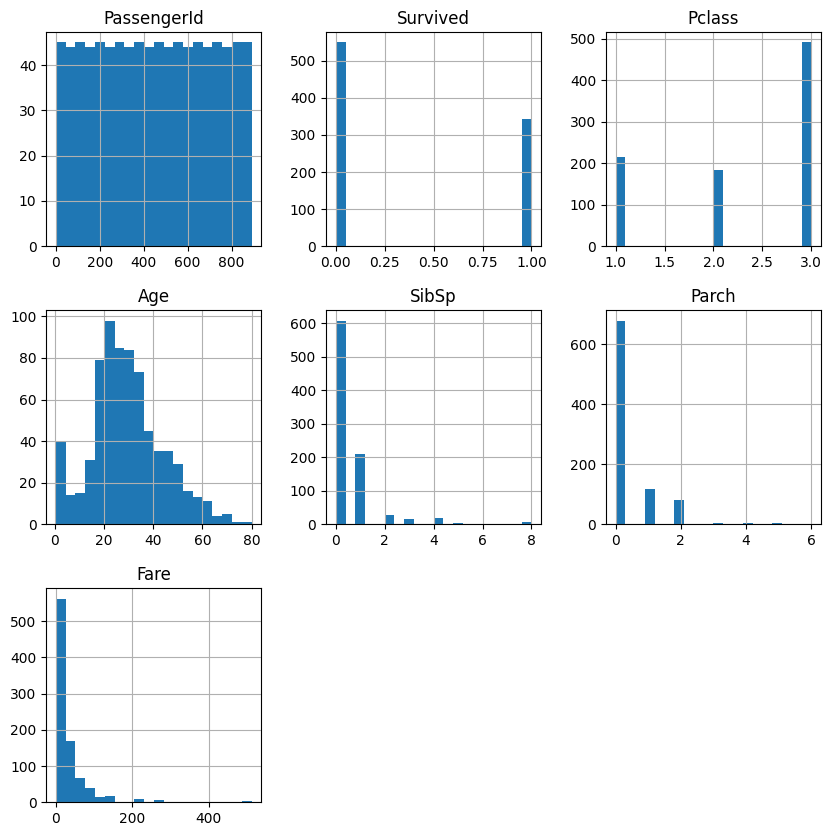

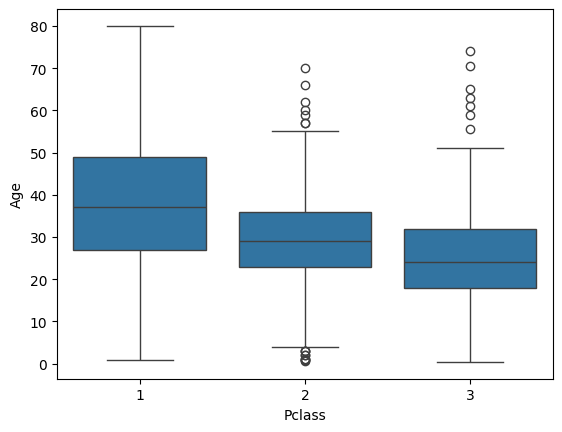

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
train_data.hist(bins=20, figsize=(10, 10))
plt.show()

# Box plots for categorical features
sns.boxplot(x='Pclass', y='Age', data=train_data)
plt.show()


In [5]:
from sklearn.impute import SimpleImputer

# Impute missing values for 'Age'
imputer = SimpleImputer(strategy='median')
train_data['Age'] = imputer.fit_transform(train_data[['Age']])
test_data['Age'] = imputer.transform(test_data[['Age']])


In [6]:
from sklearn.preprocessing import LabelEncoder

# Encode 'Sex' column
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
test_data['Sex'] = label_encoder.transform(test_data['Sex'])


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Define features and target variable
X = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = train_data['Survived']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Build and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Accuracy: 0.7988826815642458
Precision: 0.7794117647058824
Recall: 0.7162162162162162
F1 Score: 0.7464788732394366
ROC-AUC Score: 0.8797940797940798


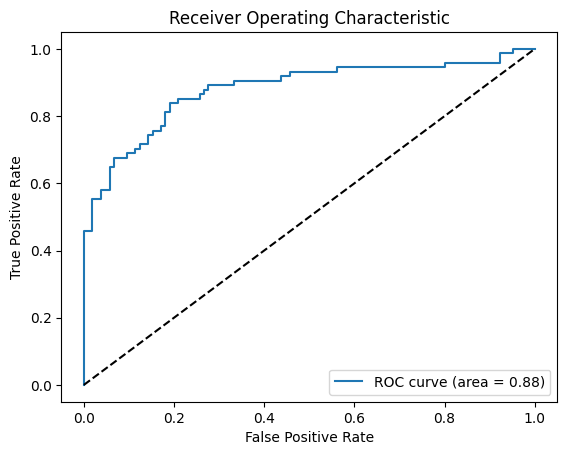

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_prob)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC-AUC Score: {roc_auc}')

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_val, y_prob)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [9]:
# Interpret the coefficients
coefficients = model.coef_[0]
feature_names = X.columns

for feature, coef in zip(feature_names, coefficients):
    print(f'{feature}: {coef}')


Pclass: -0.7799637118721527
Sex: -1.2853534711351988
Age: -0.4088011106756757
SibSp: -0.3754141428258475
Parch: -0.10889075889603983
Fare: 0.17304158840288375


In [10]:
import pickle

# Save the model
with open('logistic_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Save the scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Save the label encoder
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)


In [11]:
import streamlit as st
import pickle
import numpy as np

# Load the trained model and preprocessing objects
with open('logistic_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

with open('scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

with open('label_encoder.pkl', 'rb') as encoder_file:
    label_encoder = pickle.load(encoder_file)

# Streamlit app
st.title('Titanic Survival Prediction')
st.write('Enter passenger details to predict survival probability.')

# Input fields for user to enter passenger details
pclass = st.selectbox('Pclass', [1, 2, 3])
sex = st.selectbox('Sex', ['male', 'female'])
age = st.slider('Age', 0, 100, 25)
sibsp = st.number_input('SibSp', 0, 10, 0)
parch = st.number_input('Parch', 0, 10, 0)
fare = st.number_input('Fare', 0.0, 500.0, 50.0)

# Encode the 'Sex' input
sex_encoded = label_encoder.transform([sex])[0]

# Prepare the input data
input_data = np.array([[pclass, sex_encoded, age, sibsp, parch, fare]])
input_data = scaler.transform(input_data)

# Make prediction
prediction = model.predict(input_data)
probability = model.predict_proba(input_data)[0][1]

# Display the prediction
st.write(f'Survival Probability: {probability:.2f}')
st.write(f'Survived: {"Yes" if prediction[0] == 1 else "No"}')

# For online deployment, use Streamlit Community Cloud
# Detailed deployment instructions: https://docs.streamlit.io/streamlit-community-cloud/deploy-your-app


2024-07-20 13:16:05.197 
  command:

    streamlit run C:\Users\GAURI DUBEY\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-07-20 13:16:05.198 Session state does not function when running a script without `streamlit run`
C:\Users\GAURI DUBEY\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [13]:
import streamlit as st
import pickle
import numpy as np
import pandas as pd

# Load the trained model and preprocessing objects
with open('logistic_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

with open('scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

with open('label_encoder.pkl', 'rb') as encoder_file:
    label_encoder = pickle.load(encoder_file)

# Streamlit app
st.title('Titanic Survival Prediction')
st.write('Enter passenger details to predict survival probability.')

# Input fields for user to enter passenger details
pclass = st.selectbox('Pclass', [1, 2, 3])
sex = st.selectbox('Sex', ['male', 'female'])
age = st.slider('Age', 0, 100, 25)
sibsp = st.number_input('SibSp', 0, 10, 0)
parch = st.number_input('Parch', 0, 10, 0)
fare = st.number_input('Fare', 0.0, 500.0, 50.0)

# Encode the 'Sex' input
sex_encoded = label_encoder.transform([sex])[0]

# Prepare the input data
input_data = pd.DataFrame({
    'Pclass': [pclass],
    'Sex': [sex_encoded],
    'Age': [age],
    'SibSp': [sibsp],
    'Parch': [parch],
    'Fare': [fare]
})

# Ensure the scaler uses the correct feature names
input_data_scaled = scaler.transform(input_data)

# Make prediction
prediction = model.predict(input_data_scaled)
probability = model.predict_proba(input_data_scaled)[0][1]

# Display the prediction
st.write(f'Survival Probability: {probability:.2f}')
st.write(f'Survived: {"Yes" if prediction[0] == 1 else "No"}')


Interview Questions
What is the difference between precision and recall?
Answer : 
        1. Precision is the ratio of true positive predicition to the total predicted positives indicating how many of the predicted positive cases are actually positive
        2. Recall is the ratio of true positive prediction to the total actual positives indicating how many of the actual positive cases are captured by the model
        

What is cross-validation and why is it important in binary classification?
Answer : 
        1. Cross-validation is a technique for evaluating a model by partitioning the data into multiple subsets training the model on some subsets while testing it on the remaining ones
        2. It is important in binary classification to ensure the model generalizes well to unseen data and to prevent overfitting
        